In [189]:
import numpy as np
import matplotlib.pyplot as plt


In [190]:
filtpath = "./sun_spot_input.asc"
input_data = np.loadtxt(filtpath,skiprows=1)
print(input_data.shape)

(2819,)


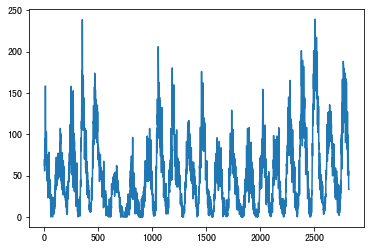

In [191]:
power = (input_data ** 2).sum() / input_data.shape[0]
plt.plot(input_data)
plt.show()

In [192]:
# lms-mse

In [193]:
order = 6
delay = 1
print(1 / (order * power))
step_size = 1 * 10 ** (-5)
print(step_size)

3.692847340936544e-05
1e-05


In [194]:
desired = input_data[order+delay:]

In [195]:
length = input_data.shape[0] - order - delay
y_pred = np.zeros(length)
e = np.zeros(length)
w = np.zeros((length,order))

In [196]:
for i in range(length):
    if i == 0:
        w_temp = np.random.normal(loc=0,scale=1,size=order)
    input_seg = input_data[i:i+order]
    input_seg = input_seg[::-1]
    y_temp = np.dot(w_temp,input_seg)
    e_temp = desired[i] - y_temp
    w_temp = w_temp + step_size * e_temp * input_seg
    y_pred[i] = y_temp
    e[i] = e_temp
    w[i,:] = w_temp.T

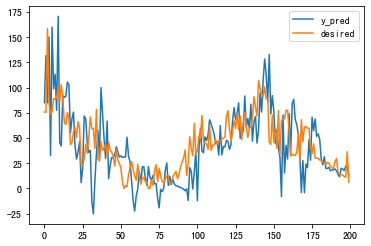

In [197]:
plt.plot(y_pred[0:200],label="y_pred")
plt.plot(desired[0:200],label="desired")
plt.legend()
plt.show()

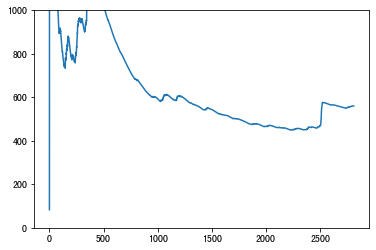

In [198]:
square_e = e ** 2
temp = 0 
mse_list = np.zeros(e.shape[0])
for i in range(y_pred.shape[0]):
    temp = (temp * i + square_e[i])/(i+1)
    mse_list[i] = temp
plt.plot(mse_list)
plt.ylim(0,1000)
plt.show()

In [199]:
# lms-mcc

In [200]:
order = 6
delay = 1
print(1 / (order * power))
step_size = 3 * 10 ** (-3)
print(step_size)

3.692847340936544e-05
0.003


In [201]:
desired = input_data[order+delay:]

In [202]:
L = 5
kernel_size2 = 0.01
learning_rate = step_size * kernel_size2 * 2
print(learning_rate)

6e-05


In [203]:
length = input_data.shape[0] - order - delay
y_pred = np.zeros(length)
e = np.zeros(length)
w = np.zeros((length,order))
w_temp = np.random.normal(loc=0,scale=0,size=order)

In [204]:
for i in range(L,length):
    input_seg = input_data[i:i+order]
    input_seg = input_seg[::-1]
    y_temp = np.dot(w_temp,input_seg)
    e_temp = desired[i] - y_temp
    G2 = np.exp(-kernel_size2 * e_temp ** 2)
    w_temp = w_temp + learning_rate * G2 * e_temp * input_seg
    y_pred[i] = y_temp
    e[i] = e_temp
    w[i,:] = w_temp.T

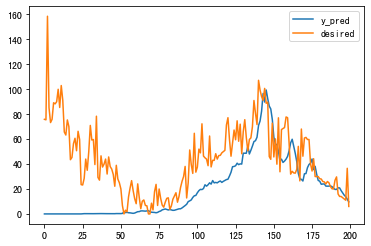

In [205]:
plt.plot(y_pred[:200],label="y_pred")
plt.plot(desired[:200],label="desired")
plt.legend()
plt.show()

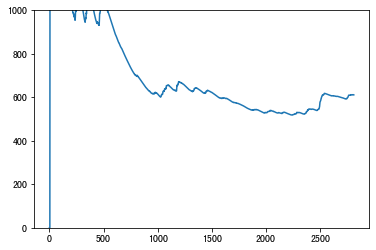

In [206]:
square_e = e ** 2
temp = 0 
mse_list = np.zeros(e.shape[0])
for i in range(y_pred.shape[0]):
    temp = (temp * i + square_e[i])/(i+1)
    mse_list[i] = temp
plt.plot(mse_list)
plt.ylim(0,1000)
plt.show()

In [207]:
# QKLMS-mse

In [561]:
order = 6
delay = 1
step_size = 0.9


In [562]:
desired = input_data[order-delay:]

In [563]:

kernel_size = 0.0001
threshold = 0

In [564]:
count = order
count_list = np.zeros([count])

In [565]:
element = input_data[0:order]
center_list = np.zeros((1,order))
center_list[0] = element


alpha = np.array([step_size * desired[order]])

result = np.zeros(1)

In [566]:
length = input_data.shape[0] - order - delay
e = np.zeros(length)
y_pred = np.zeros(length)
e_temp = desired[order]
e[0] = e_temp

In [567]:
for step in range(1,length):
    element = input_data[step:(step+order)]
    element = element.reshape(1,order)
    dist_list = ((center_list - element) ** 2).sum(1)
    dist_min = np.min(np.sqrt(dist_list))
    min_index = np.argmin(dist_list)
    
    if dist_min <= threshold:
        a = step_size * e[step-1]
        alpha[min_index] = alpha[min_index] + a
        Gs = np.exp(- kernel_size * dist_list)
        y_temp = np.dot(alpha,Gs)
        e_temp = desired[step] - y_temp
    else:
        
        count = count + 1
        Gs = np.exp(- kernel_size * dist_list) 
        
        y_temp = np.dot(alpha,Gs) 
        result = np.hstack((result,y_temp))
        e_temp = desired[step] - y_temp
        center_list = np.vstack((center_list,element))
        a = step_size * e_temp
        alpha = np.hstack((alpha,a))
    y_pred[step] = y_temp
    e[step] = e_temp
    count_list = np.hstack((count_list,count))
    
print(count)

2802


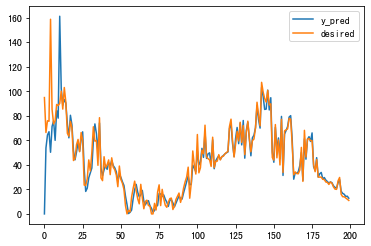

In [568]:
plt.plot(y_pred[:200],label='y_pred')
plt.plot(desired[:200],label='desired')
plt.legend()
plt.show()

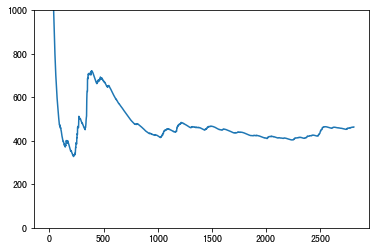

In [216]:
square_e = e ** 2
temp = 0 
mse_list = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
    temp = (temp * i + square_e[i])/(i+1)
    mse_list[i] = temp
plt.plot(mse_list)
plt.ylim(0,1000)
plt.show()

In [217]:
# QKLMS-mcc

In [218]:
order = 6
delay = 1
step_size = 4500

In [219]:
desired = input_data[order+delay:]

In [220]:
L = 100
kernel_size2 = 0.0001
kernel_size = 0.0001

threshold = 0
learning_rate = step_size * kernel_size2 * 2
print(learning_rate)

0.9


In [221]:
count = order
count_list = np.zeros([count])

In [222]:
length = input_data.shape[0] - order - delay
e = np.zeros(length)
y_pred = np.zeros(length)
e_temp = desired[order+L+delay]
e[0] = e_temp

In [223]:
element = input_data[L:L+order]
center_list = np.zeros((1,order))
center_list[0] = element


G2_0 = np.exp(-kernel_size2 * e[0] ** 2)
alpha = np.array([learning_rate * G2_0 * e[0]])

result = np.zeros(1)

In [224]:
for step in range(L+1,length):
    element = input_data[step:(step+order)]
    element = element.reshape(1,order)
    dist_list = ((center_list - element) ** 2).sum(1)
    dist_min = np.min(np.sqrt(dist_list))
    min_index = np.argmin(dist_list)
    
    if dist_min <= threshold:
        G2 = np.exp(-kernel_size2 * e[step-1] ** 2)
        a = learning_rate * G2 * e[step-1]
        alpha[min_index] = alpha[min_index] + a
        Gs = np.exp(- kernel_size * dist_list)
        y_temp = result[-1] + np.dot(alpha,Gs)
        e_temp = desired[step] - y_temp
    else:
        
        count = count + 1
        Gs = np.exp(- kernel_size * dist_list) 
        
        y_temp = np.dot(alpha,Gs) 
        result = np.hstack((result,y_temp))
        e_temp = desired[step] - y_temp
        G2 = np.exp(-kernel_size2 * e_temp ** 2)
        
        a = learning_rate * G2 * e_temp
        center_list = np.vstack((center_list,element))

        alpha = np.hstack((alpha,a))
    y_pred[step] = y_temp
    e[step] = e_temp
    count_list = np.hstack((count_list,count))
    
print(count)

2702


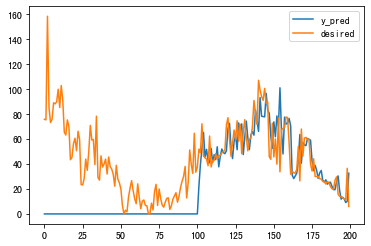

In [225]:
plt.plot(y_pred[:200],label='y_pred')
plt.plot(desired[:200],label='desired')
plt.legend()
plt.show()

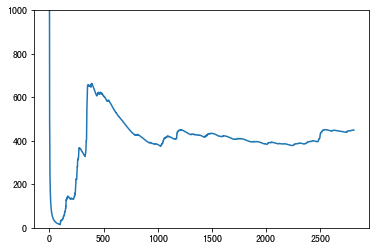

In [226]:
square_e = e ** 2
temp = 0 
mse_list = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
    temp = (temp * i + square_e[i])/(i+1)
    mse_list[i] = temp
plt.plot(mse_list)
plt.ylim(0,1000)
plt.show()

In [236]:
# rls- mse

In [237]:
order = 6
delay = 1
lamda = 0.1
forget_factor = 0.9



In [238]:
desired = input_data[order+delay:]

In [244]:
identity_matirx = np.eye(order)
c = 1

In [245]:
length = input_data.shape[0] - order - delay

e = np.zeros(length)
w = np.zeros((length,order))
y = np.zeros(length)


In [246]:
p_last = identity_matirx * c
for i in range(1,length):
    input_seg = input_data[i:i+order]
    input_seg = input_seg.reshape(1,-1)
    
    r = 1 + 1/forget_factor * input_seg @ p_last @ input_seg.T
    
    k = 1/forget_factor * p_last @ input_seg.T / r
    
    y_pred[i] = input_seg @ w[i-1,:]
    e[i] = desired[i] - y[i]
    w[i,:] = w[i-1,:] + (k * e[i]).flatten()
    p_last = 1/forget_factor * p_last - k * k.T * r
    

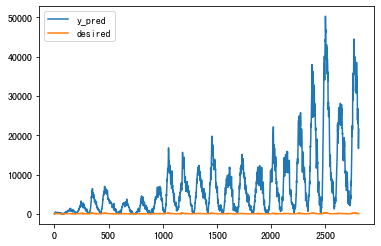

In [247]:
plt.plot(y_pred[:],label='y_pred')
plt.plot(desired[:],label='desired')
plt.legend()
plt.show() 

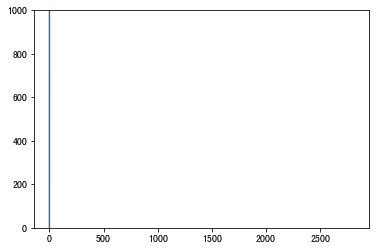

In [234]:
square_e = e ** 2
temp = 0 
mse_list = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
    temp = (temp * i + square_e[i])/(i+1)
    mse_list[i] = temp
plt.plot(mse_list)
plt.ylim(0,1000)
plt.show()

In [274]:
# KRLS-MSE

In [275]:
order = 6
delay = 1
lamda = 0.1
forget_factor = 1
kernel_size = 0.0001

In [276]:
desired = input_data[order+delay:]

In [277]:
length = input_data.shape[0] - order - delay
e = np.zeros(length)
one = np.ones(1).reshape(1,1)
Q_temp = 1/((np.array((lamda * forget_factor + 1)).reshape(1,1)))
a_temp = Q_temp * desired[0]


In [278]:
save_matrix = np.zeros((length,order))
for i in range(length):
    save_matrix[i] = input_data[i:i+order]


In [279]:
for step in range(1, length):
    print(step)
    input_seg = save_matrix[step, :]
    G = np.exp(-kernel_size * ((save_matrix[:step] - input_seg) ** 2).sum(1)).reshape(-1, 1)

    Z = Q_temp @ G

    r = (lamda * (forget_factor ** step) + 1 - Z.T @ G)
    Q_temp = Q_temp * r + Z * Z.T

    Q_temp = np.hstack((Q_temp, -Z))

    temp = np.hstack((-Z.T, one))

    Q_temp = np.vstack((Q_temp, temp))

    Q_temp = Q_temp / r
    
    y_pred[step] = np.dot(G.T, a_temp)
    
    e[step] = desired[step] - y_pred[step]

    temp2 = a_temp - Z / r * e[step]
    
    a_temp = np.vstack((temp2, e[step] / r))

1
Q_temp= [[1.]]
-Z= [[-0.73985343]]
Q_temp= [[ 1.         -0.73985343]]
temp= [[-0.73985343  1.        ]]
2
Q_temp= [[ 1.00901237 -0.39734971]
 [-0.39734971  0.93407473]]
-Z= [[-0.47371531]
 [-0.38661165]]
Q_temp= [[ 1.00901237 -0.39734971 -0.47371531]
 [-0.39734971  0.93407473 -0.38661165]]
temp= [[-0.47371531 -0.38661165  1.        ]]
3
Q_temp= [[ 0.97828746 -0.35669086 -0.43186721]
 [-0.35669086  1.07639598 -0.20804624]
 [-0.43186721 -0.20804624  1.12173812]]
-Z= [[-0.0644339 ]
 [-0.41786081]
 [-0.39535205]]
Q_temp= [[ 0.97828746 -0.35669086 -0.43186721 -0.0644339 ]
 [-0.35669086  1.07639598 -0.20804624 -0.41786081]
 [-0.43186721 -0.20804624  1.12173812 -0.39535205]]
temp= [[-0.0644339  -0.41786081 -0.39535205  1.        ]]
4
Q_temp= [[ 2.3151048  -0.91414858 -0.8765132   0.05022294]
 [-0.91414858  2.22599794 -0.39151156 -0.91444687]
 [-0.8765132  -0.39151156  2.20085888 -0.78822576]
 [ 0.05022294 -0.91444687 -0.78822576  2.038328  ]]
-Z= [[-0.63061795]
 [ 0.3410003 ]
 [ 0.04766952

In [546]:
# QKRLS-MSE

In [547]:
order = 6
delay = 1
lamda = 0.1
forget_factor = 0.9
kernel_size = 0.0001
threshold = 500

In [548]:
desired = input_data[order+delay:]

In [549]:
length = input_data.shape[0] - order - delay
e = np.zeros(length)
y_pred = np.zeros(length)


In [550]:
save_matrix = np.zeros((length,order))
for i in range(length):
    save_matrix[i] = input_data[i:i+order]

In [551]:
count = order + delay
count_list = np.zeros([count])

center_list = np.zeros((1,order))
center_list[0] = save_matrix[0]
y_hat = np.zeros(1)
y_hat[0] = desired[0]

p_last = 1/((np.array((lamda * forget_factor + 1)).reshape(1,1)))
a_last = p_last * desired[0]

one = np.ones(1).reshape(1,1)
A = one
 

In [552]:
for step in range(1,200):
    print(step)
    element = save_matrix[step]
    dist_list = ((center_list - element)**2).sum(1)
    dist_min = np.min(dist_list)
    min_index = np.argmin(dist_list)
    
    if dist_min <= threshold:
        z = np.zeros((center_list.shape[0],center_list.shape[0]))
        z[min_index,min_index] = 1
        A = A + z
        K = np.exp(-kernel_size*(center_list[:]-center_list[min_index])**2).sum(1).reshape(-1,1)
        P = p_last[:,min_index].reshape(-1,1)
        
        temp3 = P @ (K.T @ p_last) / (1 + K.T @ P)
        p_last = p_last - temp3
        y_hat[min_index] = y_hat[min_index] + desired[step]
        a_temp = p_last @ y_hat
        y_temp = np.dot(G.T, a_last)
        e_temp = desired[step] - y_temp
        
    else:
        p_temp = p_last
        a_temp = a_last
        
        G = np.exp(-kernel_size * dist_list).reshape(-1, 1)

        Z1 = p_last.T @ G
        Z2 = p_last @ A @ G
        
        r = (lamda * (forget_factor ** step) + 1 - Z2.T @ G)

        p_last = p_last * r + Z2 * Z1.T

        p_last = np.hstack((p_last, -Z2))

        temp = np.hstack((-Z1.T, one))
        p_last = np.vstack((p_last, temp))

        p_last = p_last / r
        
        A_temp = np.zeros(p_last.shape)
        
        A_temp[:-1,:-1] = A
        A_temp[-1,-1] = 1
        A = A_temp
        
        y_temp = np.dot(G.T, a_last)
        e_temp = desired[step] - y_temp
        
        temp2 = a_last - Z2 / r * e_temp

        a_last = np.vstack((temp2, e_temp / r))
        
        center_list = np.vstack((center_list,element))
        y_hat = np.hstack((y_hat,desired[step]))
        
    y_pred[step] = y_temp
    e[step] = e_temp

        

11
14
34
42
45
46
47
48
49
55
57
59
61
63
65
66
67
68
69
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
96
112
113
114
115
116
117
118
119
120
121
122
125
126
127
128
129
132
137
138
148
154
155
156
163
166
167
168
169
175
176
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [ ]:
plt.plot(y_pred[:],label='y_pred')
plt.plot(desired[:],label='desired')
plt.legend()
plt.show()